In [71]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv("ALL_2019.csv")

In [73]:
df.head()

Unnamed: 0 station           ID        DATE  TMP  TMP_0:06  TMP_0:09  \
0           0    KABE  USW00014737  2019-03-01   -7     30.00     30.75   
1           1    KABE  USW00014737  2019-03-02   14     34.75     36.00   
2           2    KABE  USW00014737  2019-03-03   17     35.25     36.50   
3           3    KABE  USW00014737  2019-03-04   11     33.50     31.00   
4           4    KABE  USW00014737  2019-03-05  -52     19.75     21.75   

   TMP_0:12  TMP_0:15  TMP_0:18  ...  TMP_1:15  TMP_1:18  TMP_1:21  TMP_2:00  \
0     31.25     32.50     33.25  ...     37.00     37.00     36.75     35.75   
1     36.00     35.25     34.50  ...     36.50     36.00     35.25     34.25   
2     36.00     36.00     34.50  ...     27.00     25.00     24.50     22.75   
3     29.00     27.00     26.00  ...     22.75     22.75     22.50     21.25   
4     21.75     22.50     22.50  ...     21.25     21.00     22.00     22.00   

   TMP_2:03  TMP_2:06  TMP_2:09  TMP_2:12  TMP_2:18  TMP_3:00  
0     35.75     34.25     35.00     34.75     33.25     33.00  
1     34.00     33.25     32.00     30.25     28.00     25.50  
2     23.00     21.75     22.25     21.75     22.75     22.50  
3     21.50     21.00     21.25     21.25     21.50     22.25  
4     23.25     23.25     24.25     24.25     25.25     25.50  

[5 rows x 26 columns]

In [74]:
# convert 10th of a degree to degree F
df['TMPF'] = (df['TMP']/10) *(9/5) + 32

In [75]:
temps = ['TMPF', 'TMP_0:06', 'TMP_0:09','TMP_0:12', 'TMP_0:15', 'TMP_0:18', 'TMP_0:21', 'TMP_1:00', 'TMP_1:03',
       'TMP_1:06', 'TMP_1:09', 'TMP_1:12', 'TMP_1:15', 'TMP_1:18', 'TMP_1:21',
       'TMP_2:00', 'TMP_2:03', 'TMP_2:06', 'TMP_2:09', 'TMP_2:12', 'TMP_2:18',
       'TMP_3:00']

In [76]:
def get_hours(name):
    _, time = name.split("_")
    days, hours = time.split(':')
    return (int(hours) + 24*int(days))

In [77]:
new_cols = dict((t,get_hours(t)) for t in temps[1:])
new_cols.update({'TMPF':"baseline"})

In [78]:
dfr = df.rename(columns=new_cols)
dfr.head()

Unnamed: 0 station           ID        DATE  TMP      6      9     12  \
0           0    KABE  USW00014737  2019-03-01   -7  30.00  30.75  31.25   
1           1    KABE  USW00014737  2019-03-02   14  34.75  36.00  36.00   
2           2    KABE  USW00014737  2019-03-03   17  35.25  36.50  36.00   
3           3    KABE  USW00014737  2019-03-04   11  33.50  31.00  29.00   
4           4    KABE  USW00014737  2019-03-05  -52  19.75  21.75  21.75   

      15     18  ...     42     45     48     51     54     57     60     66  \
0  32.50  33.25  ...  37.00  36.75  35.75  35.75  34.25  35.00  34.75  33.25   
1  35.25  34.50  ...  36.00  35.25  34.25  34.00  33.25  32.00  30.25  28.00   
2  36.00  34.50  ...  25.00  24.50  22.75  23.00  21.75  22.25  21.75  22.75   
3  27.00  26.00  ...  22.75  22.50  21.25  21.50  21.00  21.25  21.25  21.50   
4  22.50  22.50  ...  21.00  22.00  22.00  23.25  23.25  24.25  24.25  25.25   

      72  baseline  
0  33.00     30.74  
1  25.50     34.52  
2  22.50     35.06  
3  22.25     33.98  
4  25.50     22.64  

[5 rows x 27 columns]

## Plot JFK to check

/opt/conda/envs/cuny-summer-2020/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


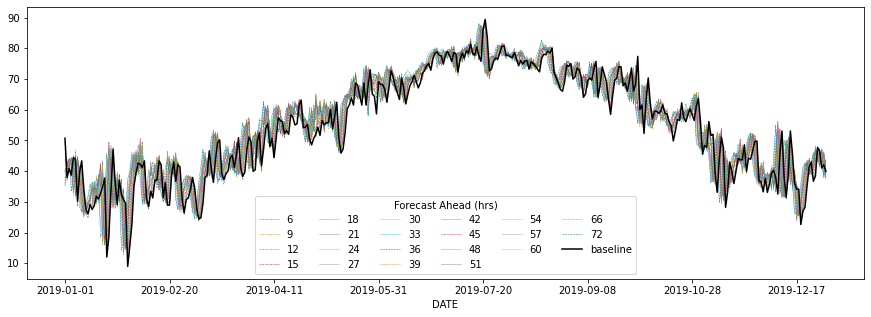

In [79]:
fig, ax = plt.subplots(figsize=(15,5))

for col in new_cols.values():
    station = dfr[dfr['station'].str.match('KJFK')][['DATE',col]].set_index('DATE')
    if col == 'baseline':
        station.plot(ax=ax, color='k', zorder=10)
    else:
        station.plot(ax=ax, linewidth=.5, linestyle='--')
    
ax.legend(title="Forecast Ahead (hrs)", ncol=6, loc = 'lower center')

# Plot Observation Grids

<ipython-input-80-bdca179b151b>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


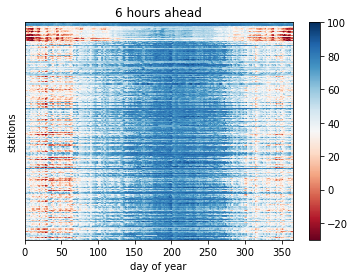

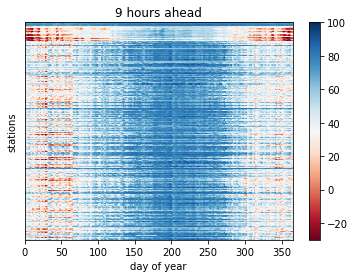

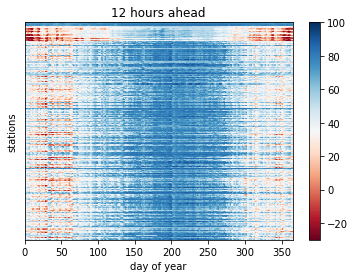

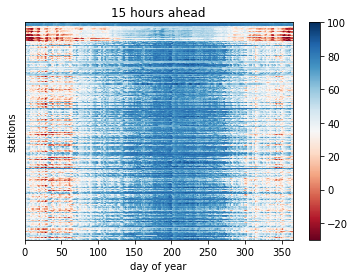

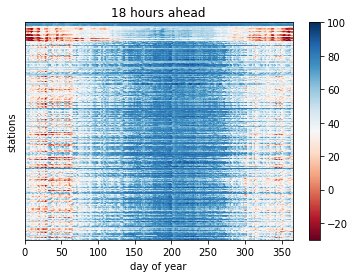

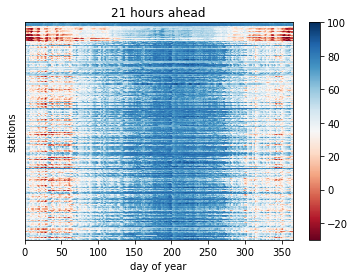

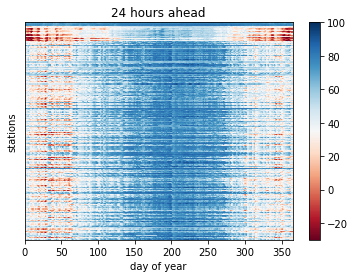

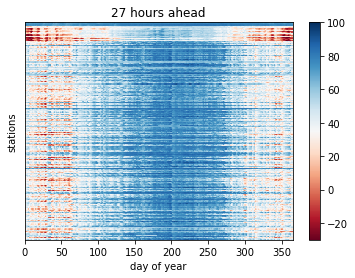

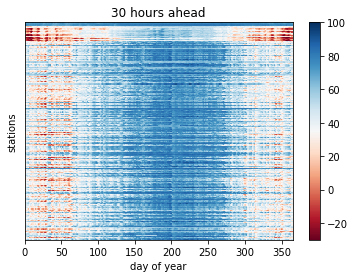

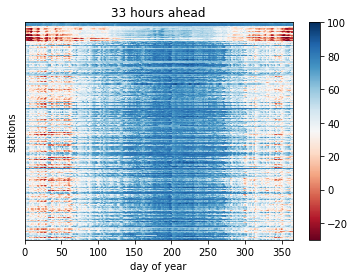

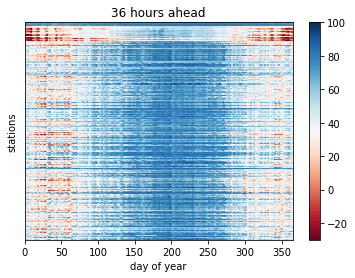

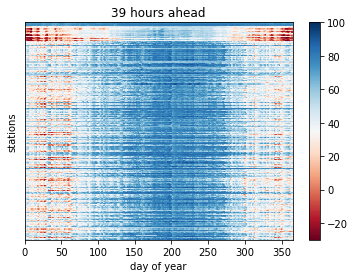

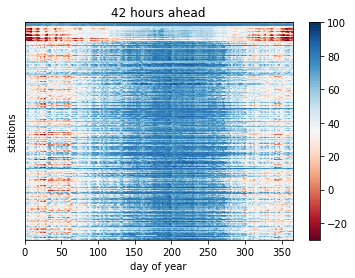

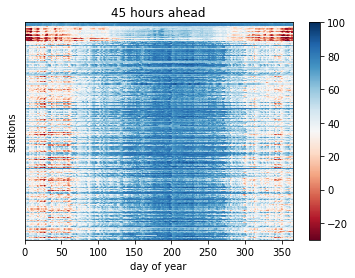

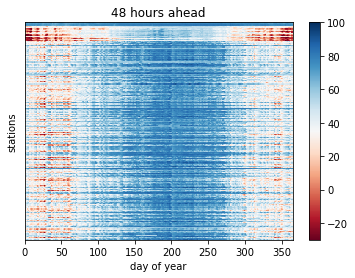

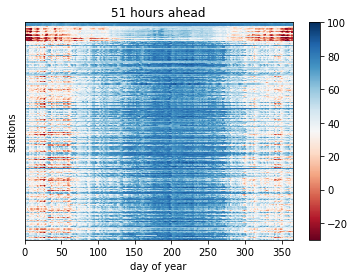

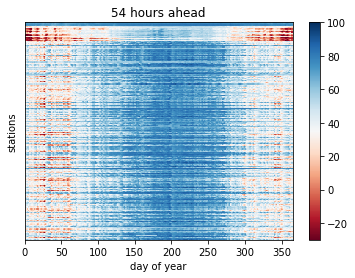

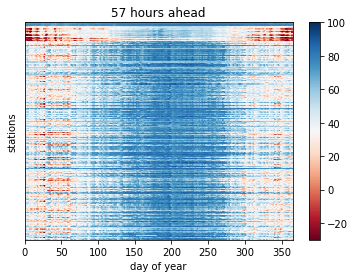

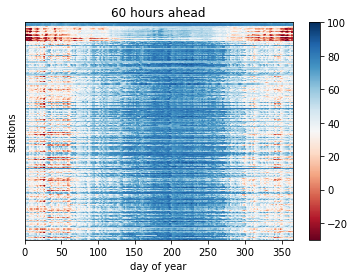

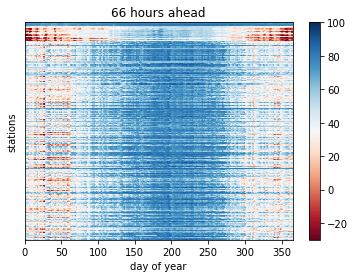

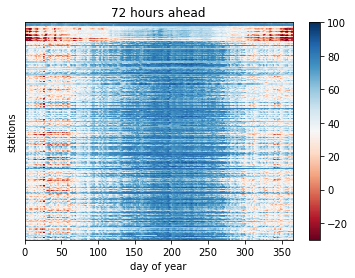

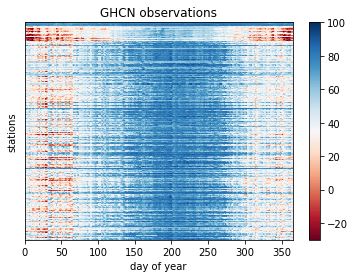

In [80]:
for col in new_cols.values():
    temp_grid = dfr[['station', 'DATE', col]].pivot(index='station', columns='DATE', values=col)
    
    fig, ax = plt.subplots()
    if col=='baseline':
        title='GHCN observations'
    else:
        title=f'{col} hours ahead'
    ax.set_title(title)
    im = ax.pcolormesh(temp_grid, vmin=-30, vmax=100, cmap='RdBu')
    ax.set(ylabel="stations", xlabel="day of year")
    ax.set_yticklabels([]) # removed individual station ids cause not super helpful here
    ax.tick_params(axis='y', length=0)
    fig.colorbar(im, ax=ax)
    fig.savefig(f"{col}.png")

# Error images

<ipython-input-82-45c151ff3224>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


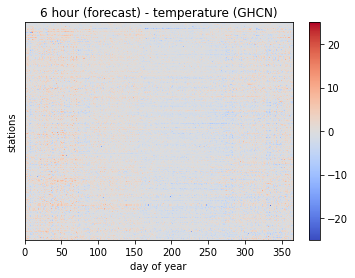

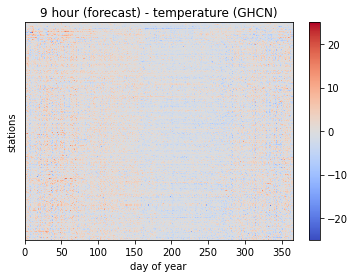

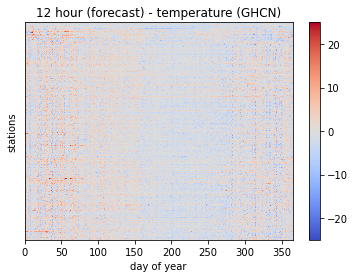

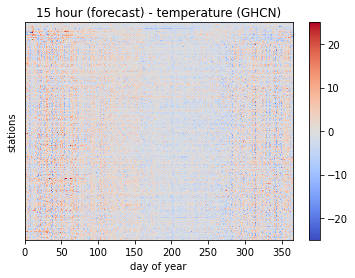

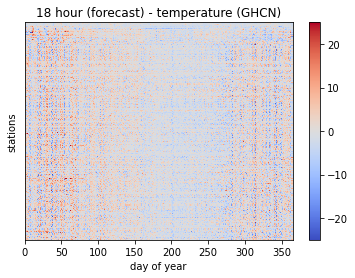

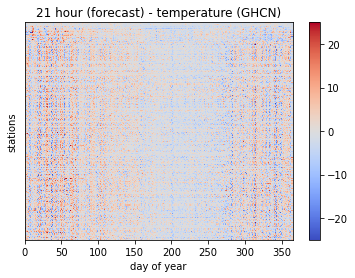

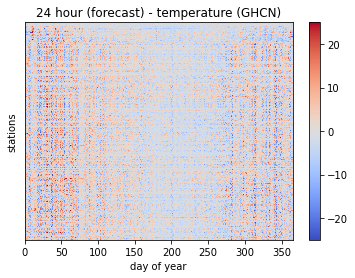

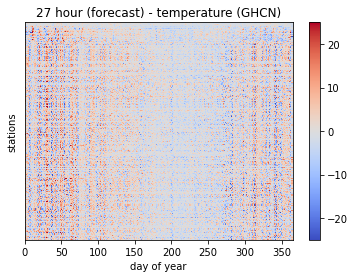

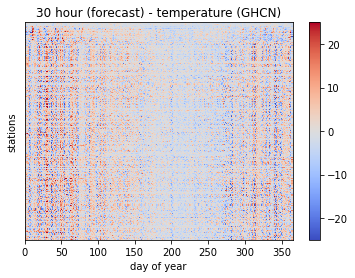

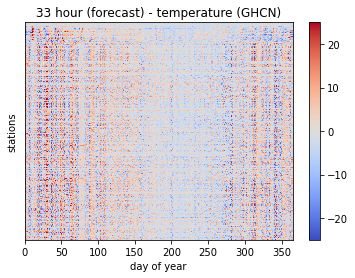

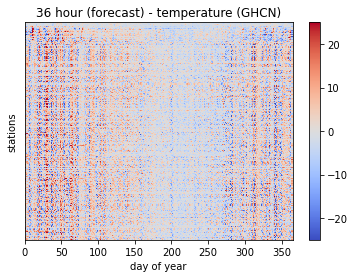

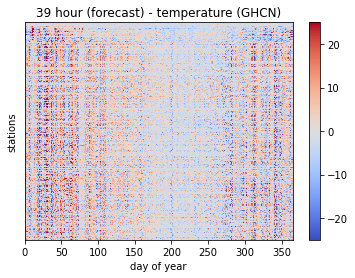

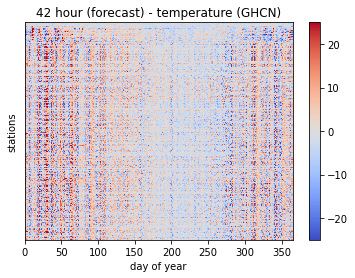

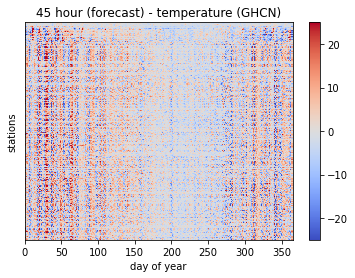

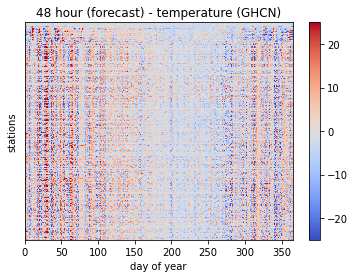

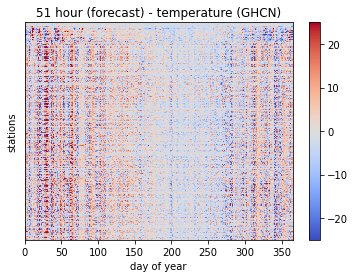

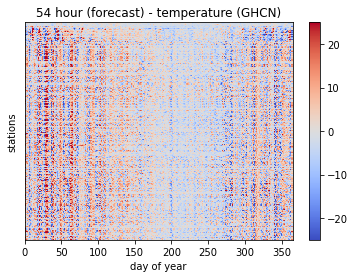

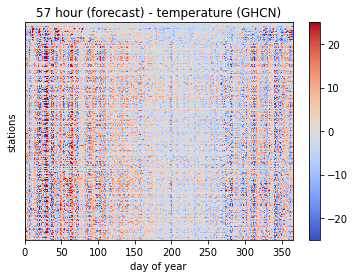

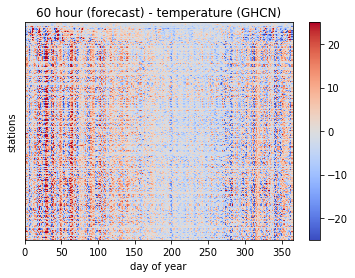

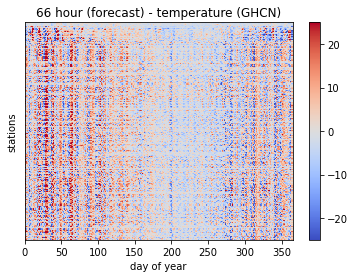

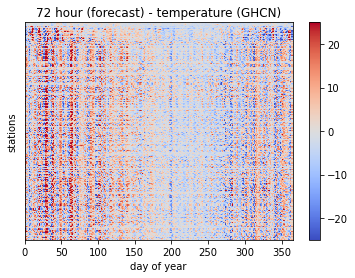

In [82]:
baseline = df[['station', 'DATE', 'TMPF']].pivot(index='station', columns='DATE', values='TMPF')

for col in new_cols.values():
    if col == 'baseline':
        continue
    temp_grid = dfr[['station', 'DATE', col]].pivot(index='station', columns='DATE', values=col)
    fig, ax = plt.subplots()
    ax.set_title(f'{col} hour (forecast) - temperature (GHCN)')
    im = ax.pcolormesh(temp_grid-baseline, vmin=-25, vmax=25,  cmap='coolwarm')
    ax.set(ylabel="stations", xlabel="day of year")
    ax.set_yticklabels([]) # removed individual station ids cause not super helpful here
    ax.tick_params(axis='y', length=0)
    fig.colorbar(im, ax=ax)
    fig.savefig(f"ghcn_minius_{col}.png")

# Histograms

In [83]:
baseline = df[['station', 'DATE', 'TMPF']].pivot(index='station', columns='DATE', values='TMPF')

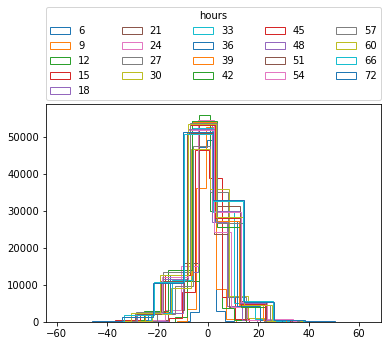

In [84]:
fig, ax = plt.subplots()
for col in new_cols.values():
    if col == 'baseline':continue
    temp_grid = dfr[['station', 'DATE', col]].pivot(index='station', columns='DATE', values=col)
    ax.hist((temp_grid-baseline).values.ravel(), label=col, histtype='step') 

ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=5, mode="expand", borderaxespad=0., title='hours')
fig.savefig(f"hist.png")

The above end sup so noisy it's kind of hard to see the differences, so instead we're going to try a technique called small multiples where we plot each histogram underneath the other, all on the same x and y intervals.

In [ ]:
# https://matplotlib.org/matplotblog/posts/create-ridgeplots-in-matplotlib/
fig, ax = plt.subplots(figsize=(5,10), nrows=len(temps[1:]), sharex=True, sharey=True, 
                       constrained_layout=True)
fig.suptitle("Histogram of Forecast Errors")
for ax, col in zip(ax, new_cols.values()):
    if col=='baseline':continue
    temp_grid = dfr[['station', 'DATE', col]].pivot(index='station', columns='DATE', values=col)
    sns.distplot((temp_grid-baseline).values.ravel(), 
                 hist_kws={'histtype':'step'}, ax=ax)
    ax.axvline(x=0, color='darkgrey')
   
    ax.annotate(f'{col} hours', (-60,0.2))
    # we more care about the shape then the y values
    ax.set_yticklabels([])
    ax.tick_params(axis='y', length=0)

fig.subplots_adjust(hspace=0)
fig.savefig(f"hist_stacked.png")

<ipython-input-85-aaea3f6abae7>:17: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(hspace=0)
